### **Data Acquisition**

In [161]:
# Importing essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

*Note: Ensure `raw_survey_data.csv` is in the same directory as this notebook before running the code.*

In [162]:
# Loading dataset from csv into Pandas DataFrame.
df = pd.read_csv('raw_survey_data.csv')

### **Data Exploration**

In [163]:
# Displays the first five rows of the dataset.
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [164]:
# Provides the number of rows and columns in the dataset.
df.shape

(11552, 82)

In [165]:
# Identifies the data types of each column.
print(df.dtypes.to_string())

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal                 float64
CompFreq                   object
ConvertedComp             float64
WorkWeekHrs   

In [166]:
# Computes the average age of individuals in the dataset.
df['Age'].mean()

30.77239449133718

In [167]:
# Counts the number of unique countries represented in the dataset.
df['Country'].nunique()

135

### **Data Wrangling**

#### Identifying Duplicates

In [168]:
# Extracts and displays all duplicate rows present in the dataset.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1168,2339,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1169,2342,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,Some college/university study without earning ...,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech meetups or events in your area;Courses on...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Easy
1170,2343,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Canada,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,27.0,Man,No,Straight / Heterosexual,Black or of African descent;White or of Europe...,No,Appropriate in length,Neither easy nor difficult
1171,2344,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1172,2347,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Woman,No,Straight / Heterosexual,Biracial,No,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,4674,"I am not primarily a developer, but I write co...",Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Bangladesh,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,31.0,Man,No,Bisexual;Gay or Lesbian;Straight / Heterosexual,Black or of African descent;Hispanic or Latino...,Yes,Too long,Neither easy nor difficult
2298,4675,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech meetups or events in your area,27.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
2299,4676,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Finland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Somewhat less welcome now than last year,NaN,36.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
2300,4677,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",...,Just as welcome now as I felt last year,NaN,40.0,Man,No,Straight / Heterosexual,White or of European descent

In [169]:
# Returns the total number of duplicate rows in the dataset.
len(duplicate_rows)

154

In [170]:
# Returns the number of duplicate values specifically in the 'Respondent' column.
len(duplicate_rows['Respondent'])

154

#### Removing Duplicates

In [171]:
# Removes duplicate rows from the dataset to ensure unique records.
df.drop_duplicates(inplace=True)

In [172]:
# Returns the total number of rows after removing duplicates.
len(df)

11398

In [173]:
# To check if any duplicate rows remain in the dataset.
len(df[df.duplicated()])

0

In [212]:
# To check if any duplicate values specifically not in the 'Respondent' column.
len(df[df['Respondent'].duplicated()])

0

In [175]:
# Displays the updated shape of the dataset after duplicate removal.
df.shape

(11398, 82)

In [176]:
# Returns the shape of the 'Respondent' column, verifying its dimensions after duplicate removal.
df['Respondent'].shape

(11398,)

#### Identifying Missing values

In [177]:
# Returns the number of missing values in each column.
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 82, dtype: int64

In [178]:
# Identifies columns that contain missing values and filters them out.
missing_values = df.isnull().sum()[df.isnull().sum() != 0]
print(missing_values.to_string())

OpenSource                  81
Student                     51
EdLevel                    112
UndergradMajor             737
EduOther                   164
OrgSize                     96
DevType                     65
YearsCode                    9
Age1stCode                  13
YearsCodePro                16
JobSat                       1
LastInt                    413
FizzBuzz                    37
JobFactors                   3
ResumeUpdate                39
CompTotal                  809
CompFreq                   206
ConvertedComp              816
WorkWeekHrs                122
WorkPlan                   121
WorkChallenge              164
WorkRemote                   8
WorkLoc                     32
ImpSyn                       5
CodeRev                      1
CodeRevHrs                2426
UnitTests                   29
PurchaseHow                196
PurchaseWhat                38
LanguageWorkedWith          11
LanguageDesireNextYear     134
DatabaseWorkedWith         453
Database

#### Replacing Missing Values

In [179]:
# Determines the most frequently occurring value (mode) in the 'WorkLoc' column.
df['WorkLoc'].mode()

0    Office
Name: WorkLoc, dtype: object

In [180]:
# Fills missing values in the 'WorkLoc' column with mode'Office' as a default value.
df['WorkLoc'] = df['WorkLoc'].fillna('Office')

In [181]:
# To verify that there are no remaining missing values in the 'WorkLoc' column.
df['WorkLoc'].isnull().sum()

0

In [182]:
# Determines the most frequently occurring value (mode) in the 'WorkRemote' column.
df['WorkRemote'].mode()

0    Less than once per month / Never
Name: WorkRemote, dtype: object

In [183]:
# Fills missing values in the 'WorkRemote' column with mode value.
df['WorkRemote'] = df['WorkRemote'].fillna('Less than once per month / Never')

In [184]:
#To verify that there are no remaining missing values in the 'WorkRemote' column.
df['WorkRemote'].isnull().sum()

0

In [187]:
# Computes the median salary from the 'ConvertedComp' column.
df['ConvertedComp'].median()

57745.0

In [188]:
# Fills missing values in the 'ConvertedComp' column with median value.
df['ConvertedComp'] = df['ConvertedComp'].fillna(57745)

In [189]:
# To verify that there are no remaining missing values in the 'ConvertedComp' column.
df['ConvertedComp'].isnull().sum()

0

#### One Hot Encoding

In [185]:
# Counts the occurrences of each unique category in the 'Employment' column.
df["Employment"].value_counts()

Employment
Employed full-time    10968
Employed part-time      430
Name: count, dtype: int64

In [186]:
# Performs one-hot encoding on the 'Employment' column, converting categorical values into binary columns.
df_encoded = pd.get_dummies(df["Employment"])
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)
df[['Employment','Employed full-time','Employed part-time']].head()

,Employment,Employed full-time,Employed part-time
0,Employed full-time,1,0
1,Employed full-time,1,0
2,Employed full-time,1,0
3,Employed full-time,1,0
4,Employed full-time,1,0


#### Feature Scaling

*Min-Max Scaling is applied to the ConvertedComp column to normalize the salary values.*

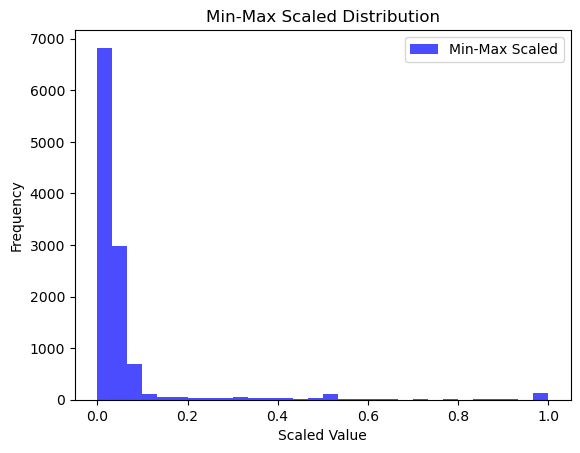

In [190]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df['ConvertedComp_Normalized'] = scaler_minmax.fit_transform(df[['ConvertedComp']])

# Histogram for Min-Max Scaling
plt.hist(df['ConvertedComp_Normalized'], bins=30, color='blue', alpha=0.7, label='Min-Max Scaled')
plt.title('Min-Max Scaled Distribution')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.legend()


*A log transformation is applied to the ConvertedComp_Normalized column to reduce skewness in distribution. The distribution is plotted before and after log transformation to observe improvements in skewness.*

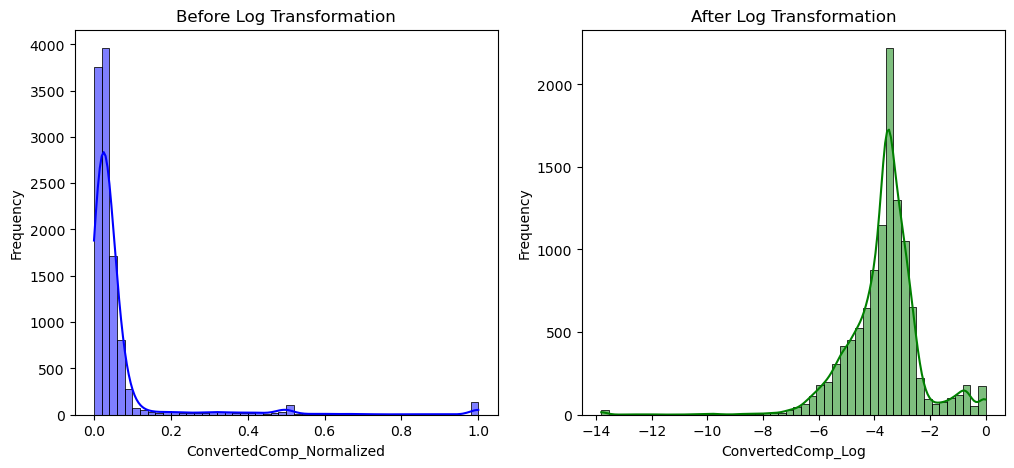

In [191]:
# Applies log transformation
df['ConvertedComp_Log'] = np.log(df['ConvertedComp_Normalized'] + 1e-6)

# Creates subplots to compare distributions before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plots original normalized distribution
sns.histplot(df['ConvertedComp_Normalized'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Before Log Transformation')
axes[0].set_xlabel('ConvertedComp_Normalized')
axes[0].set_ylabel('Frequency')

# Plots log-transformed distribution
sns.histplot(df['ConvertedComp_Log'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('After Log Transformation')
axes[1].set_xlabel('ConvertedComp_Log')
axes[1].set_ylabel('Frequency')

plt.show()

#### Feature Extraction

*A new feature, Annual_Compensation is derived by converting CompFreq (Yearly, Monthly, Weekly) into a numerical column CompFreq_Num and computing the product of CompTotal and CompFreq_Num*

In [192]:
df['CompFreq'].value_counts()

CompFreq
Yearly     6073
Monthly    4788
Weekly      331
Name: count, dtype: int64

In [193]:
# Fills missing values in 'CompFreq' with most repeated value
df['CompFreq'] = df['CompFreq'].fillna("Yearly")
df['CompFreq'].value_counts()

CompFreq
Yearly     6279
Monthly    4788
Weekly      331
Name: count, dtype: int64

In [194]:
# Converts compensation frequency into numerical equivalents
df['CompFreq_Num'] = np.where(df['CompFreq'] == 'Yearly', 1, 
                      np.where(df['CompFreq'] == 'Monthly', 12, 52))

In [195]:
# Displays the count of each unique numerical value in 'CompFreq_Num' to verify with 'CompFreq'
df['CompFreq_Num'].value_counts()

CompFreq_Num
1     6279
12    4788
52     331
Name: count, dtype: int64

In [196]:
# Calculates 'Annual_Compensation' by multiplying 'CompTotal' with 'CompFreq_Num
df['Annual_Compensation'] = df['ConvertedComp'] * df['CompFreq_Num']
#Displays top 15 rows for calculation verification
df[['ConvertedComp','CompFreq','CompFreq_Num','Annual_Compensation']].head(15)

,ConvertedComp,CompFreq,CompFreq_Num,Annual_Compensation
0,61000.0,Yearly,1,61000.0
1,95179.0,Yearly,1,95179.0
2,90000.0,Yearly,1,90000.0
3,455352.0,Monthly,12,5464224.0
4,65277.0,Yearly,1,65277.0
5,31140.0,Monthly,12,373680.0
6,41244.0,Monthly,12,494928.0
7,103000.0,Yearly,1,103000.0
8,69000.0,Yearly,1,69000.0
9,26388.0,Monthly,12,316656.0


*A new feature, Experience_Level is derived by categorizing experience levels as Entry, Mid, Senior, and Expert based on years of professional coding experience from YearsCodePro*

In [197]:
# Displays the unique values in the 'YearsCodePro' column
df['YearsCodePro'].unique()

array(['Less than 1 year', '4', '8', '3', '2', '13', '18', '1', '22',
       '23', '19', '10', '9', '7', '5', '6', '20', '12', '35', '11', '15',
       '16', '21', '29', '14', '26', '30', '25', '17', nan, '28', '37',
       '40', '33', '24', '32', '34', '27', '39', '31', '38', '44', '43',
       '36', '48', '42', '45', '47'], dtype=object)

In [198]:
# Replaces 'Less than 1 year' with '0' to convert the column into a numeric format
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0') 
# Converts 'YearsCodePro' from object (string) type to float
df['YearsCodePro'] = df['YearsCodePro'].astype('float')
# Displays the updated unique values to verify the transformation
df['YearsCodePro'].unique()

array([ 0.,  4.,  8.,  3.,  2., 13., 18.,  1., 22., 23., 19., 10.,  9.,
        7.,  5.,  6., 20., 12., 35., 11., 15., 16., 21., 29., 14., 26.,
       30., 25., 17., nan, 28., 37., 40., 33., 24., 32., 34., 27., 39.,
       31., 38., 44., 43., 36., 48., 42., 45., 47.])

In [199]:
# Checks the data type of the 'YearsCodePro' column to confirm conversion
df['YearsCodePro'].dtype

dtype('float64')

In [200]:
# Creates a new column 'Experience_Level' based on 'YearsCodePro'
df['Experience_Level'] = np.where(df['YearsCodePro'] <= 2, 'Entry',
                          np.where(df['YearsCodePro'] <= 5, 'Mid',
                          np.where(df['YearsCodePro'] <= 10, 'Senior', 'Expert')))

In [201]:
#Converts float type into Int64 
df['YearsCodePro'] = df['YearsCodePro'].astype('Int64')  

In [202]:
df[['YearsCodePro','Experience_Level']].head()

,YearsCodePro,Experience_Level
0,0,Entry
1,4,Mid
2,8,Senior
3,3,Mid
4,2,Entry


####  Handling Outliers

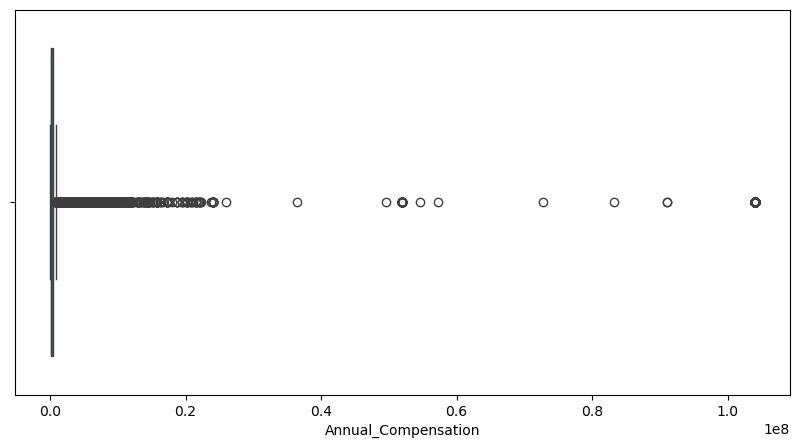

In [203]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Annual_Compensation, data=df)
plt.show()

In [204]:
# Provides summary statistics for 'ConvertedComp'
df['Annual_Compensation'].describe()

count    1.139800e+04
mean     2.116892e+06
std      1.164173e+07
min      0.000000e+00
25%      6.259800e+04
50%      1.150000e+05
75%      3.848760e+05
max      1.040000e+08
Name: Annual_Compensation, dtype: float64

In [205]:
# Calculate IQR
Q1 = df['Annual_Compensation'].quantile(0.25)  # 25th percentile
Q3 = df['Annual_Compensation'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
IQR

322278.0

In [206]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, '\n', upper_bound)

-420819.0 
 868293.0


In [207]:
len(df)

11398

In [208]:
# Creates a filtered dataset that excludes outliers
df_no_outliers = df[(df['Annual_Compensation'] >= lower_bound) & (df['Annual_Compensation'] <= upper_bound)]
# Returns the number of outliers
len(df)-len(df_no_outliers)

1128

Since almost 10% of the data are outliers, removing them could cause data loss. So Capping is performed here because it prevents extreme values from skewing analysis without removing valid responses.

In [209]:
# Cap outliers to the upper and lower bounds using the IQR method
df['Annual_Compensation'] = np.clip(df['Annual_Compensation'], lower_bound, upper_bound)

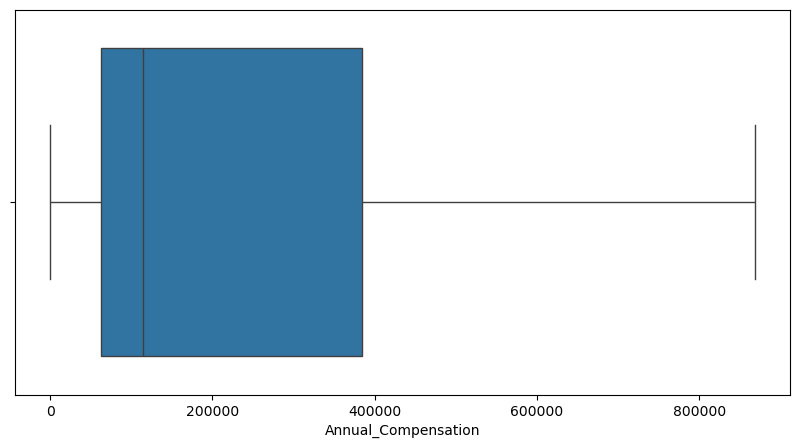

In [210]:
#Verification on Capping
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Annual_Compensation, data=df)
plt.show()

In [211]:
# Saves the cleaned and processed DataFrame to a CSV file for further EDA
df.to_csv('processed_data.csv', index=False)